# Ejemplos modulo Fundamentos de IA y ML


### Ejercicio: Crear un chatbot de atención al cliente para dispositivos tecnológicos  
Imagina que tienes una tienda online que vende diversos dispositivos tecnológicos. Los clientes preguntan con frecuencia sobre los detalles de los productos, las políticas de devolución, las opciones de envío y la resolución de problemas técnicos. En lugar de gestionar todas las preguntas manualmente, decides implementar un chatbot sencillo para ofrecer respuestas rápidas.

**Su chatbot manejará consultas como:**  
* Información del producto : “Cuéntame sobre el producto X”, “¿Tenéis relojes inteligentes?”
* Detalles de envío : "¿Cuánto tiempo tarda el envío?", "¿Qué métodos de envío están disponibles?"
* Política de devoluciones : "¿Cuál es su política de devoluciones?", "¿Cómo devuelvo un producto?"
* Soporte técnico : “Mi gadget no se enciende”, “¿Cómo reinicio mi dispositivo?”


In [ ]:
# Simple Customer Support Chatbot

responses = {
      "hi": "Hello! Welcome to TechGadget Support. How can I assist you today?",
      "do you have smartwatches": "Yes, we have a variety of smartwatches. You can check them out on our products page.",
      "shipping time": "Shipping usually takes 3-5 business days.",
      "shipping methods": "We offer standard, expedited, and overnight shipping.",
      "return policy": "You can return products within 30 days of receipt for a full refund.",
      "how to return": "To return a product, please visit our returns page for a step-by-step guide.",
      "won’t turn on": "Make sure your gadget is charged. If it still won’t turn on, you can visit our troubleshooting page.",
      "reset device": "To reset your device, hold down the power button for 10 seconds. If that doesn't work, please check the manual for a factory reset.",
      "bye": "Thank you for visiting TechGadget. If you have more questions, feel free to ask. Goodbye!"
}

def get_bot_response(user_input):
      user_input = user_input.lower()

      for keyword, response in responses.items():
          if keyword in user_input:
              return response

      return "I'm not sure how to respond to that. Can you try asking something else?"

while True:
      user_input = input("You: ")
      if user_input.lower() in ["quit", "exit", "bye"]:
          print("Bot: Goodbye! If you have any more questions, we're here to help.")
          break

      response = get_bot_response(user_input)
      print(f"Bot: {response}")

# Exercise: Supervised vs Unsupervised

  In this exercise, you wil complete two machine learninig using the jupyter notebook below 
  * Supervised Learning 
  * Unsupervised Learning 

  los datos que usamos aca son sinteticos 

### Part 1: Predicting Building Energy Efficiency (Supervised Learning)

  **Scenario:**  
    Trabajas en una firma de arquitectos y tu tarea es crear un modelo que prediga la calificacion de eficiencia energética de los edificios basandose en caracteristicas como el área de las paredes, el area del techo, la altura total, etc  

In [ ]:
# Import necessary libraries , librerias necesarias para el proyecto de eficiencia energetica ---------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings ----------------------------------------------------------------------------------------------
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing--------------------------------------------------------------------------------------------------------------------------------------------------------
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)---------------------------------------------------------------------------------------
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets---------------------------------------------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model-------------------------------------------------------------------------------------------------------------------------------------------------------------
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate-------------------------------------------------------------------------------------------------------------------------------------------------------------
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values-------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### Entendamos el Algoritmo Random Forest Regressor 

Identificamos a **sklearn.ensemble** como metodos en scikit-learn para clasificar, hacer regresiones y deteccion de anomalias. 

en este ejercicio ilustrativo entrenamos un modelo **RandomForestRegressor** para predecir la eficiencia energetica de los edificios en funcion de sus caracteristicas como el area en la pared, techo, la altura total y el area acristalada.

Los resultados esperados para este ejemplo son: 

* **La visualizaciones de datos**: los diagramas de dispercion muestran la relacion entre cada caracteristica y la variable objetico(eficiencia energética), aca vemos como los cambios en las caracteristicas pueden relacionarse con la eficiencia energetica; sin embargo en datos sinteticos como es el caso de estos datos de ejemplos estas relaciones no pueden mostrar tendencias claras.

* **Rendimientos del modelo**: tras entrenar el modelo y realizzar predicciones, se evalua mediante el **Error Cuadrado Medio** (EMM). con datos sintéticos, el valor del ECM puede variar pero proporciona de manera importante una idea del error promedio en las predicciones del modelo. **Cuanto mas este valor se acerque a cero, mejor cera el rendimiento del modelo.**

* **Grafico de prediccion vs Valor Real:** el grafico de dispercion que me permite comparar los valores reales con las predicciones del modelo idealmente deberia mostrar puntos a lo largo de la linea diagonal (y=x), lo que indica predicciones precisas , la desviacion de esta linea sugiere errores de prediccion

# Part 2: Vehicle Clustering (Unsupervised Learning)

  scenario: You are a working for an automotive company, and your task is to cluster into groups based on their features such as weight, engine size, and horsepower

  ## Unsupervised Learning code: To cluster vehicles based on their specifications 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning - no necesitas 
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

## Understand This Example: Unsupervised Learning Vehicles Clustering
 en este ejercicio se utilizo la agrupacion en clústeres de KMeans para agrupar vehiculos segun sus caracteristicas, como peso, tamaño del motor y caballos de fuerza. 

 ### Resultados esperados: 

  * **Visualización de clústers:** el diagrama de dispersión representará visualmente cómo se agrupan los vehículos según su peso y potencia. Cada clúster se representará con un color diferente, cada dato sintético , la distinción de clústeres puede variar, pero lo es estudiantes deberian ver las agrupaciones seún las características seleccionadas,

  * **Interpretación de grupos:** No existen "etiquetas" correctas en el aprendizaje no supervizado, pero se debe ver como se agrupan los vehículos segun sus caracteristicas, por ejemplo podemos ver que los vehiculos mas pesados y con mayor potencia se agrupan 


 # Entender este código

### Aclaracion

Con el fin o la finalidad de hacer los ejemplos mas amigables para su comprencion con el estudiante se han utilizado datos sinteticos que simplifican el entendimiento del ejemplo y su aplicacion con datos reales puedes ser mas enriquecedor y mas complejo. a su vez se escogen los modelos **RandomForestRegressor** para aprendizaje supervisado y **Kmeans** para aprendizaje no supervisado esto se usaron de manera general por su aplicabilidad general a la mayoria de tareas posibles con  fines educativos,

# Construcción de un árbol de decisiones para predecir la pérdida de clientes

In [ ]:
# Import necessary libraries
import pandas as pd # Para manejar datos 
import matplotlib.pyplot as plt # Para Crear graficas de los resultados 
import warnings # para Manejar Advertencias 
from sklearn.model_selection import train_test_split # para dividir los datos en conjuntos de entrenamiento y prueba 
from sklearn.tree import DecisionTreeClassifier # para crear el modelo de arbol de decisíon 
from sklearn.metrics import accuracy_score # para evaluar la precisión del modelo
from sklearn import tree # para visualizar el arbol de decisín 

warnings.filterwarnings('ignore') # es importante si no lo incluyes apareceran algunas advertencias, especialmmente para las versiones de algunas librerias, sod advertencias no errores y no afectan el resto del codigo 



In [ ]:
# Creating a synthetic dataset - creados de manera arbitraria para el ejemplo son falsos
# This dataset simulates customer data for a telecom company
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer - ID único para cada cliente
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers - Edad de los clientes
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount - Monto de la factura mensual
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10   # Churn status - Variable Objetivo, indica si el se fue o no del servicio 
}
df = pd.DataFrame(data)

df.head(10) 

In [ ]:
# Splitting the dataset into features ( Caracteristicas X) and target variable (la variable objetivo y)-------------------------------------------------------------------------------
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']] # Caracteristicas del cliente son atributos que consideramos importantes para predecir la variable objetivo 
y = df['Churn'] # la variable objetico, indicandonos si el cliente se fue o no del servicio 



In [ ]:
# Splitting the dataset into training and testing sets - Una mayor división de los datos en conjuntos de entrenamiento y prueba 
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

"""
cuando entrenamos un modelo este aprende a partir de los datos de entrenamiento (X_train, Y_train) y nuestro algoritmo analiza estos datos y aprende de ellos con la finalidad de que 
pueda adquirir patrones y relaciones entre las caracteristicas y la variable objetivo ayudando asi a hacer predicciones sobrfe datos no vistos en que podrian encontrar en el futuro
"""



In [ ]:
# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# usamos el metodo fit para entrenar el modelo con los datos de entrenamiento (X_train, y_train)

In [ ]:

# Making predictions on the test set
y_pred = clf.predict(X_test) 

print("Predictions:", y_pred)

In [ ]:
# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred) # aca lo que hacemos es comparar las predicciones del modelo con los datos reales de prueba y asi obtenemos la precision del modelo medianet una funcion de sklearn que mide la precision del modelo 
print(f'Model Accuracy: {accuracy}') 

In [ ]:
# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,13))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

### Construcción de un árbol de decisiones para predecir la pérdida de clientes 

planteemos la problematica **Eres un analista de datos en una empresa de telecomunicaciones. El departamento de marketing ha detectado un aumento en la pérdida de clientes y necesita tu ayuda para identificar qué clientes y necesita tu ayuda para identificar que clientes tienen más probabilidad de abandonar la empresa en el proximo mes**

### Tus Tareas 
en este ejercicio la idea es crear un modelo de arbol de decisión para precedir la pérdida de clientes en una empresa de telecomunicaciones. **la pérdida de clientes** se refiere a  cuando una persona deja de hacer negocios con una empresa.Predecir la pérdida de clientes es crucial para que las empresas fidelicen a sus clientes abordando sus problemas de forma pro activa. 

### Vamos a entender la solución de mejor manera 

Al visualizar un árbol de decisión, especialmente uno creado con Scikit-learn DecisionTreeClassifier, observará varios términos en cada nodo. Comprender estos términos es crucial para interpretar el proceso de toma de decisiones del árbol. Analicemos cada uno de estos términos:

- **Gini**
La impureza de Gini es una medida de la frecuencia con la que un elemento elegido al azar del conjunto estaría etiquetado incorrectamente si se etiquetara al azar de acuerdo con la distribución de etiquetas en el subconjunto.

La impureza de Gini varía de 0 a 0,5, donde 0 indica que todos los elementos del subconjunto pertenecen a la misma clase (pureza perfecta) y 0,5 significa que los datos se distribuyen aleatoriamente entre varias clases.

En los árboles de decisión, generalmente se prefiere una impureza de Gini más baja ya que indica una mayor pureza del nodo.  
- **Muestras:** Este valor representa el número de muestras (o registros) que llegan al nodo.

Da una idea de cuánto de los datos de entrenamiento se ven afectados por las condiciones que conducen a este nodo.

Una gran cantidad de muestras en un nodo significa que la condición o regla asociada con ese nodo es relevante para una parte significativa del conjunto de datos.
- **Valor:** Esto muestra la distribución de las muestras en diferentes clases en ese nodo particular.

En un problema de clasificación binaria (como la predicción de abandono con 'Sí' o 'No'), el valor se presenta como una lista de dos números. El primer número indica el número de muestras en la primera clase y el segundo, el número de muestras en la segunda.

Esta distribución ayuda a comprender qué clase es predominante en un nodo particular.
- **Clase:** Esto indica la clase que se predeciría si el recorrido del árbol de decisión finaliza en ese nodo.

Se determina en función de la clase mayoritaria de las muestras que llegan al nodo. Por ejemplo, si la mayoría de las muestras de un nodo pertenecen a la clase "Sin abandono", el nodo predecirá "Sin abandono".

- **Nombre de la función (por ejemplo, 'Cargo mensual'):** Esta no es una parte estándar de la descripción del nodo del árbol de decisión, pero puede aparecer en las ramas del árbol.

Representa la característica (o atributo) utilizada para dividir los datos en ese nodo.

Por ejemplo, si ve "CargoMensual <= 80", significa que el árbol está dividiendo los datos en este nodo en función de si el cargo mensual es menor o igual a 80.
Comprender estos componentes es esencial para interpretar cómo el árbol de decisión realiza sus predicciones y qué características influyen en el proceso de toma de decisiones. Esto puede proporcionar información valiosa, especialmente en contextos empresariales como la predicción de la pérdida de clientes.

## Expliquemos el Decision Tree 

 tengamos en cuenta la explicabilidad que es la capacidad que yo pueda explicar algo en este caso es este modelo y mas concreto aca por que hace las predicciones o por que hizo una prediccion en particular, es muy valioso en especial cuando te pueden preguntar ¿ Como llegaste a una conclusion en concreto ?, realmente tu necesitas entender cómo se toman las decisiones, por que al final como desarrollador de ML, eres el responsable de las predicciones que hagas y tambien debes asegurarte de que sean correctas y poder explicarlas

 **Conceptos clave**:
- División del conjunto de datos : El conjunto de datos se divide en conjuntos de entrenamiento y de prueba. Normalmente, el 70 % de los datos se utiliza para entrenar el modelo y el 30 % restante se reserva para las pruebas.

- Datos de entrenamiento vs. Datos de prueba : Los datos de entrenamiento se utilizan para entrenar el modelo de aprendizaje automático. Por el contrario, los datos de prueba, que el modelo no ha visto durante el entrenamiento, se utilizan para evaluar su rendimiento y capacidad de generalización.

- Proceso de Entrenamiento del Modelo : Este proceso implica el uso de un método de ajuste, donde el modelo se entrena utilizando características (X_train) y objetivos (Y_train). Los datos de prueba no se utilizan en esta etapa.

- Evaluación de Predicción y Precisión : Tras el entrenamiento, el modelo realiza predicciones basadas en los datos de prueba (prueba X). Estas predicciones se comparan con los resultados reales (prueba Y) para calcular la precisión del modelo.

# Redes Neuronales 

en este ejercicio crearemos un ejemplo sencillo de red neuronal, utilizando un conjunto de datos sintetico, con la finalidad de **Predecir si un cliente realizará una compra en función de dos características:** 

1. Duración de la visita al sitio web. 
2. Número de páginas visitadas. 

Definimos esta tarea como un **PROBLEMA DE CLASIFICACION BINARIA**  y usaremos una red neuronal pequeña para una ejecución rapida. 

la finalidad de este ejercicio es presentar los fundamentos de la contrucción y el entrenamiento de una red neuronal simple con datos sinteticos, **el modelo predice el comportamiento de compra del cliente, un problema empresarial tipico mediante una arquitectura de red neuronal sencilla y rápida**

## Generacion de datos sintéticos

In [30]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

print(df.head(10))  # Display the first 10 rows of the DataFrame


   VisitDuration  PagesVisited  Purchase
0       0.548814      0.715189         1
1       0.602763      0.544883         1
2       0.423655      0.645894         1
3       0.437587      0.891773         1
4       0.963663      0.383442         1
5       0.791725      0.528895         1
6       0.568045      0.925597         1
7       0.071036      0.087129         0
8       0.020218      0.832620         0
9       0.778157      0.870012         1


## Preprocesamiento de los datos 


In [31]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

## Construir y entrenar la red neuronal 

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# research Above ReLu and sigmoid activation functions

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# La idea aca es que entre mas veces (epoch) pase por esos datos de etrenamiento como lo hace el modelo, mejor se vuelve en predecir resultados. por que tendra mas oportunidad de aprender patrones de esos datos y mejorar su precision

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.4683 - loss: 0.6863 - val_accuracy: 0.4688 - val_loss: 0.6769
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4422 - loss: 0.6900 - val_accuracy: 0.5312 - val_loss: 0.6739
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4445 - loss: 0.6862 - val_accuracy: 0.5938 - val_loss: 0.6710
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4603 - loss: 0.6917 - val_accuracy: 0.5938 - val_loss: 0.6685
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5324 - loss: 0.6889 - val_accuracy: 0.6250 - val_loss: 0.6657
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6140 - loss: 0.6782 - val_accuracy: 0.6250 - val_loss: 0.6627
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5738 - loss: 0.6794 - val_accuracy: 0.6875 - val_loss: 0.6597
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6012 - loss: 0.6741 - val_accuracy: 0.7188

## Evaluar el modelo 

In [33]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8917 - loss: 0.3703
Test Loss: 0.36225125193595886
Test Accuracy: 0.8999999761581421


## Entender la solúcion de estas redes neuronales 

En este caso, y a diferencia de los decision tree, las redes neuronales o más bien su proceso no es fácil de visualizar, ya que se consideran modelos de cajas negras. Sin embargo, vamos y podemos visualizar ciertos aspectos de estos modelos con el fin de obtener más información.

podemos visualizar ciertas cosas como: 

1. **Proceso de entrenamiento**: Puedes trazar la pérdida y la precisión del entrenamiento y la validación a lo largo de las épocas para comprender cómo está aprendiendo el modelo.   

2. **Límite de decisión**: Para una red neuronal simple como la del ejemplo con 2 características de entrada puedes visualizar el límite de decisión en un gráfico 2D.   

Veremos cómo implementar estas visualizaciones.

en el contexto de este ejemplo simple, la precisión y la pérdida del modelo son dos **métricas** importante que se utilizan para medir el rendimiento, explicaremos brevemente cada una:

1. **La precisión del modelo:** es la fracción de predicciones correctas de nuestro modelo. En este ejemplo, es la proporción de decisiones de compra (tanto de compra como de no compra) predichas correctamente de entre todas las predicciones realizadas del modelo.  
**Por ejemplo, si el modelo realiza 200 predicciones y acierta en 150, la precisión sería 150/200 = 0.75 (o 75%)**

 - Fórmula - Precisión = (Número de predicciones correctas) / (Número total de predicciones)
 - Interpretación : **una mayor precisión indica un modelo con mejor rendimiento.** Por ejemplo, una precisión de 0,90 significa que el 90 % de las predicciones del modelo son correctas.

2. **La pérdida del modelo**: esta métrica mide el error entre las predicciones del modelo y las etiquetas de clase real (los datos verdaderos) durante la etapa de test.  no es un porcentage de fatto como tal sino una medida numérica del error. ( Funcion de perdida y varia segun el problema- tarea- algoritmo-modelo) y luego promedia todas las instancias

*Por ejemplo, compara lo que predice el modelo con los valores reales y calcula cuánto se equivoca.  
Una menor pérdida indica que el modelo está haciendo mejores predicciones.* 

 - **Entropia cruzada binaria** Funcion de perdida: se utiliza en tareas de clasificacion binaria.**calcula la pérdida de cada instancia comparando la probabilidad predicha con la etiqueta con la etiqueta real (0 a 1) y luego promedia todas las instancias.**

 > $$Loss = -[y * log(p) + (1-y) * log(1-p)]$$

  * $$ y \ es \ la \ etiqueta \ real \  ( 0 \ o \ 1)$$ 
  * $$ p \ la \ probabilidad \ predicha \ por \ el \ modelo \ para \ la \ clase \ 1$$

 - **Interpretacion**: Los valores de perdida mas bajos son mejores, lo que indica que las predicciones del modelo se aproximan más a las etiquetas reales. Un valor de pérdida alto significa que las predicciones del modelo se alejan mucho de las etiquetas reales.

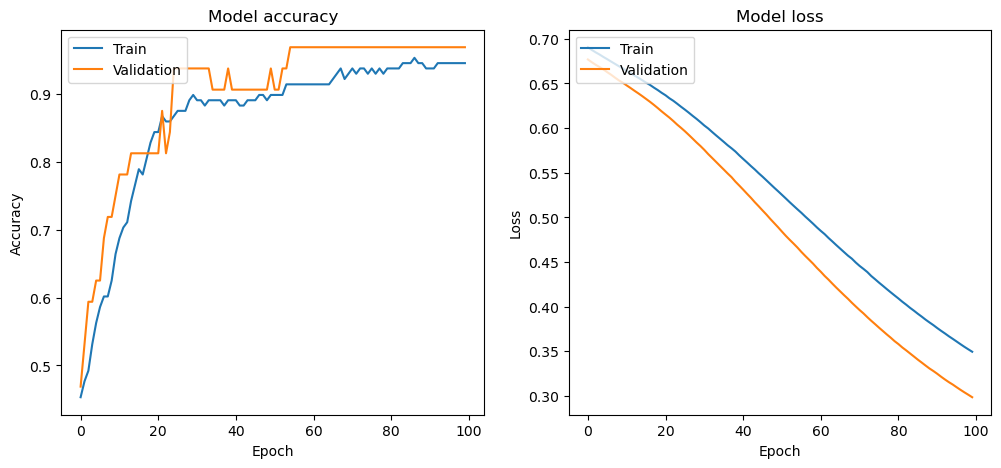

In [ ]:

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Límite (Frontera) de decisión 

En este ejemplo para predecir el comportamiento de compra del cliente, el límite de decisión es un concepto utilizado para visualizar cómo la red neuronal categoriza o clasifica los datos.

El límite de decisión es un límite en el espacio de características que separa los puntos de datos en diferentes clases según las predicciones del modelo. En este caso tenemos 2 características de entrada ya mencionadas antes. El límite de decisión será una línea o curva en este espacio bidimensional que separa los puntos que se predicen que realizarán una compra (clase 1) de aquellos que se predice que no realizarán una compra (clase 0).

- **Cómo se determina**: La red neuronal aprende el límite de decisión durante el entrenamiento. Ajusta sus parámetros internos (pesos y sesgos) para clasificar correctamente los datos de entrenamiento. **El límite es donde la salida del modelo (antes de aplicar un umbral) se encuentra en un valor crítico, generalmente 0.5 para la clasificación binaria con una salida sigmoidea. Los puntos en un lado del límite se clasifican como una clase, y los puntos en el otro lado como la otra.**

¿Qué es la salida del modelo (antes de aplicar el umbral)? Esto es porque cada RN para clasificación binaria en su última capa suele tener una función de activación sigmoidea. Esta transforma el resultado en un valor entre cero y uno (0 y 1) que es interpretado como la probabilidad de que el ejemplo pertenezca a la clase positiva, en este caso la compra.  
Por ejemplo:  
Si la salida es 0.8, el modelo predice que hay un 80% de probabilidad de compra.  
Si la salida es 0.2, el modelo predice que hay un 20% de probabilidad de compra.

¿Qué es el umbral?  
El umbral es el valor que se usa para decidir la clase final.  
Por convención, se usa 0.5:

- Si la probabilidad es mayor o igual a 0.5, se predice clase 1 (compra).
- Si es menor a 0.5, se predice clase 0 (no compra).

- **Visualización**: En el gráfico, el límite de decisión se representa típicamente mediante una línea o contorno. Se predice que los puntos que caen a un lado del límite pertenecen a una clase, y los del otro lado, a la otra. El límite de decisión puede ser lineal o no lineal, según la complejidad del modelo y la naturaleza de los datos.

El límite de decisión en nuestro ejemplo de red neuronal sirve como herramienta visual para entender cómo el modelo diferencia entre los clientes con probabilidades de realizar una compra y aquellos que no, en función de sus métricas de participación en el sitio web. es mas como una herramienta visual para entender como el modelo diferencia entre clientes esto no explica realmente el proceso de toma de decisio es algo mas simple y didactico ya que la explicabilida de las RN es un campo muy complejo esto es pra analizar el resultado y muierar si cumple con la precision adecuada 



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


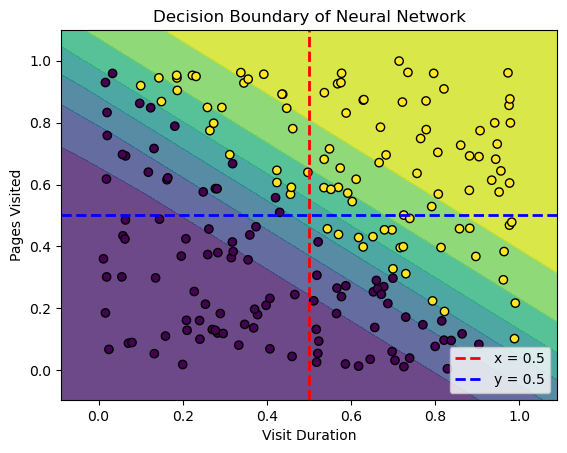

In [25]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
# Insert two lines at x=0.5 and y=0.5 to show their intersection
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='x = 0.5')
plt.axhline(y=0.5, color='blue', linestyle='--', linewidth=2, label='y = 0.5')
plt.legend()
plt.show()
